<a href="https://colab.research.google.com/github/arnav39/d2el-en/blob/main/3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.4 Linear Regression from scratch

In [ ]:
!pip install matplotlib_inline
!pip install --upgrade d2l==1.0.0a0

In [ ]:
help(torch.normal)

Help on built-in function normal in module torch:

normal(...)
    normal(mean, std, *, generator=None, out=None) -> Tensor
    
    Returns a tensor of random numbers drawn from separate normal distributions
    whose mean and standard deviation are given.
    
    The :attr:`mean` is a tensor with the mean of
    each output element's normal distribution
    
    The :attr:`std` is a tensor with the standard deviation of
    each output element's normal distribution
    
    The shapes of :attr:`mean` and :attr:`std` don't need to match, but the
    total number of elements in each tensor need to be the same.
    
    .. note:: When the shapes do not match, the shape of :attr:`mean`
              is used as the shape for the returned output tensor
    
    .. note:: When :attr:`std` is a CUDA tensor, this function synchronizes
              its device with the CPU.
    
    Args:
        mean (Tensor): the tensor of per-element means
        std (Tensor): the tensor of per-element st

In [ ]:
torch.normal(0, 1, (2, 3))
# mean = 0
# std_dev = 1
# size = (2, 3)

tensor([[-2.2378,  0.3761,  0.1021],
        [ 1.2296, -0.7625, -1.3092]])

In [ ]:
%matplotlib inline
import torch
from d2l import torch as d2l

In [ ]:
class LinearRegressionScratch(d2l.Module):

  def __init__(self, num_inputs, lr, sigma=0.01):
    super().__init__()
    self.save_hyperparameters() # saves function arguments into class's attributes
    self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
    self.b = torch.zeros(1, requires_grad=True)

In [ ]:
a = torch.rand(5, 1)
b = torch.rand(1, 1, requires_grad=True)
c = torch.randn(1, requires_grad=True)

d = torch.mm(a, b) + c
print(f"d.shape = {d.shape}")
print(f"d = {d}")

d.shape = torch.Size([5, 1])
d = tensor([[2.4605],
        [2.4482],
        [2.4691],
        [2.4820],
        [2.5713]], grad_fn=<AddBackward0>)


In [ ]:
def add_to_class(Class):
  def wrapper(obj):
    setattr(Class, obj.__name__, obj)
  return wrapper

In [ ]:
@add_to_class(LinearRegressionScratch)
def forward(self, X):
  return torch.matmul(X, self.w) + self.b

In [ ]:
@add_to_class(LinearRegressionScratch)
def loss(self, y_hat, y):
  l = (y_hat - y.reshape(y_hat.shape)) ** 2 / 2
  return l.mean()

In [ ]:
# optimizer

class SGD(d2l.HyperParameters):

  def __init__(self, params, lr):
    self.save_hyperparameters()

  def step(self):
    for param in self.params:
      param -= self.lr * param.grad

  def zero_grad(self):
    for param in self.params:
      if param.grad is not None:
        param.grad_zero_()

In [ ]:
@add_to_class(LinearRegressionScratch)
def configure_optimizer(self):
  return SGD([self.w, self.b], self.lr)

In [ ]:
model = LinearRegressionScratch(2, lr=0.03)
data = d2l.SyntheticRegressionData(w = torch.tensor([2, -3.4]), b = 4.2)
trainer = d2l.Trainer(max_epochs=3)

In [ ]:
model.w

tensor([[-1.1922e-05],
        [-4.4621e-03]], requires_grad=True)

In [ ]:
d2l.Trainer.fit??

In [ ]:
trainer.fit(model, data)

ValueError: ignored

## Ex 3.4

## Q1

when we initialise the weights to zero, the model is not able to learn anything when we use nn.Linear model

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
X_numpy, y_numpy = datasets.make_regression(n_samples=1000, n_features=5, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)).reshape(-1, 1)

In [ ]:
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

X.shape = torch.Size([1000, 5])
y.shape = torch.Size([1000, 1])


forward pass : y_hat and loss

backward pass : grad

update : params

In [ ]:
a = torch.randn(100, 1)
b = torch.randn(100, 1)

c = nn.MSELoss()
c(a, b).item()

1.8610917329788208

In [ ]:
a = torch.rand(100, 5)
b = torch.rand(5, 1)

c = torch.mm(a, b)
print(c.shape)

torch.Size([100, 1])


In [ ]:
a = torch.zeros((5, 1), dtype=torch.float32, requires_grad=True)
print(a.shape)
print(a)

torch.Size([5, 1])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], requires_grad=True)


In [ ]:
a = torch.rand(100, 5)
b = torch.zeros(5, 1)

print(f"a.shape = {a.shape}")
print(f"b.shape = {b.shape}")

a.shape = torch.Size([100, 5])
b.shape = torch.Size([5, 1])


In [ ]:
c = torch.mm(a, b)
c.shape

torch.Size([100, 1])

In [ ]:
d = [b]
d

[tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]])]

## Not using nn.Linear : the weights are able to learn

In [ ]:
w = torch.zeros(X.shape[1], 1, requires_grad=True)

max_epochs = 100
learning_rate = 0.07

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(max_epochs):

  # forward pass
  y_hat = torch.mm(X, w)
  l = loss(y, y_hat)

  # backward pass
  l.backward()

  # update params
  optimizer.step()

  # zero the grad
  optimizer.zero_grad()

  if (epoch+1)%10 == 0:
    print(f"epoch {epoch+1}/{max_epochs}, w = {w}, loss = {l}")

epoch 10/100, w = tensor([[54.5013],
        [ 5.2077],
        [ 5.4963],
        [26.9403],
        [23.8573]], requires_grad=True), loss = 932.4965209960938
epoch 20/100, w = tensor([[68.0343],
        [ 7.2285],
        [ 6.4760],
        [31.9780],
        [29.3999]], requires_grad=True), loss = 428.60595703125
epoch 30/100, w = tensor([[71.4157],
        [ 7.8356],
        [ 6.6342],
        [32.9059],
        [30.6978]], requires_grad=True), loss = 399.1352844238281
epoch 40/100, w = tensor([[72.2644],
        [ 7.9995],
        [ 6.6559],
        [33.0716],
        [31.0045]], requires_grad=True), loss = 397.36029052734375
epoch 50/100, w = tensor([[72.4782],
        [ 8.0413],
        [ 6.6579],
        [33.0994],
        [31.0776]], requires_grad=True), loss = 397.25115966796875
epoch 60/100, w = tensor([[72.5322],
        [ 8.0515],
        [ 6.6578],
        [33.1035],
        [31.0951]], requires_grad=True), loss = 397.244384765625
epoch 70/100, w = tensor([[72.5458],
    

## Using torch only: weights are not able to learn

In [ ]:
w = torch.zeros(X.shape[1], 1, requires_grad=True)

max_epochs = 10
learning_rate = 0.07
n_samples, n_features = X.shape
input_size=n_features
output_size=1

model = nn.Linear(input_size, output_size)
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(max_epochs):

  # forward pass
  y_hat = model(X)
  l = loss(y, y_hat)

  # backward pass
  l.backward()

  # update params
  optimizer.step()

  # zero the grad
  optimizer.zero_grad()

  if (epoch+1)%1 == 0:
    print(f"epoch {epoch+1}/{max_epochs}, loss = {l}")

epoch 1/10, loss = 7565.421875
epoch 2/10, loss = 5762.1455078125
epoch 3/10, loss = 4414.8525390625
epoch 4/10, loss = 3407.599365234375
epoch 5/10, loss = 2654.09716796875
epoch 6/10, loss = 2090.081787109375
epoch 7/10, loss = 1667.656982421875
epoch 8/10, loss = 1351.0985107421875
epoch 9/10, loss = 1113.7457275390625
epoch 10/10, loss = 935.6865844726562


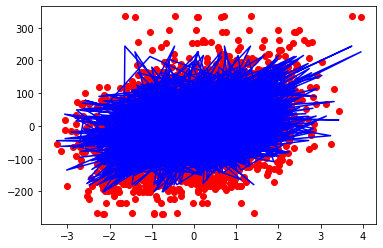

In [ ]:
predictions = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predictions, 'b');

In [ ]:
torch.normal(0, 100, (2, 1))

tensor([[ 95.5811],
        [-58.3666]])

In [ ]:
a = torch.rand(4, 3,requires_grad=True)

In [ ]:
try:
  a.shape[1]
except:
  a = a.reshape(-1, 1)

In [ ]:
a

tensor([[0.8787, 0.3696, 0.2905],
        [0.6539, 0.8666, 0.2512],
        [0.7758, 0.4490, 0.4571],
        [0.2726, 0.2643, 0.1135]], requires_grad=True)

In [ ]:
def give_data(n_samples, w, b, noise=0.01):

  try:
    w.shape[1]
  except:
    w = w.reshape(-1, 1)
    
  X = torch.randn(n_samples, len(w))
  noise = torch.randn(n_samples, 1) * noise
  y = torch.mm(X, w) + b + noise
  return X, y

In [ ]:
class LinearRegression():

  def __init__(self, input_size, output_size, lr=0.01, std=0.01):
    self.input_size = input_size
    self.output_size = output_size
    self.lr = lr
    # self.w = torch.normal(0, std, (input_size, 1), requires_grad=True, dtype=torch.float32)
    self.w = torch.zeros(input_size, 1, requires_grad=True, dtype=torch.float32)
    self.b = torch.zeros(1, requires_grad=True, dtype=torch.float32)

  def forward(self, X):
    y_hat = torch.mm(X, self.w) + self.b
    return y_hat

  def loss(self, y_hat, y):
    crit = nn.MSELoss()
    return crit(y_hat, y)

In [ ]:
class Optim(): 

  def __init__(self, params, lr):
    self.params = params
    self.lr = lr

  def update(self):
    with torch.no_grad():
      for param in self.params:
        param -= self.lr * param.grad

  def empty_grad(self):
    for param in self.params:
      param.grad.zero_()

In [ ]:
class Trainer():

  def __init__(self, model, X, y):
    self.model = model
    self.X = X
    self.y = y
    self.optimizer = Optim([model.w, model.b], model.lr)

  def train_model(self, max_epochs=100):

    for epoch in range(max_epochs):

      # forward_pass:
      y_hat = self.model.forward(self.X)
      l = self.model.loss(self.y, y_hat)

      # backward_pass:
      l.backward(retain_graph=True)

      # update the params:
      self.optimizer.update()

      # empty the grad:
      self.optimizer.empty_grad()

      if (epoch+1) % (max_epochs/10) == 0:
        print(f"epoch : {epoch+1}/{max_epochs}, w = {self.model.w[0][0].item():.3f} & {self.model.w[1][0].item():.3f}, b = {self.model.b.item():.3f}, loss = {l:.4f}")

In [ ]:
w = torch.tensor([1.0, -2.5], dtype=torch.float32).reshape(-1, 1)
b = torch.tensor(-4.6, dtype=torch.float32)

X, y = give_data(1000, w, b)

In [ ]:
print(X.shape, y.shape)

torch.Size([1000, 2]) torch.Size([1000, 1])


In [ ]:
model = LinearRegression(X.shape[1], y.shape[1])
optimizer = Optim([model.w, model.b], model.lr)

max_epochs = 1000

for epoch in range(max_epochs):

  # forward pass
  y_hat = model.forward(X)
  l = model.loss(y_hat, y)

  # backward pass
  l.backward(retain_graph=True)

  # update the params
  optimizer.update()

  # zero the grad
  optimizer.empty_grad()

  if (epoch+1)%100 == 0:
    print(f"epoch : {epoch+1}/{max_epochs}, w = {model.w[0][0].item():.3f} & {model.w[1][0].item():.3f}, b = {model.b.item():.3f}, loss = {l:.4f}")

NameError: ignored

In [ ]:
w = torch.tensor([-5.9, 3.2], dtype=torch.float32, requires_grad=True)
b = torch.tensor([-9.4], dtype=torch.float32, requires_grad=True)

X, y = give_data(1000, w, b)
model = LinearRegression(X.shape[1], y.shape[1])
trainer = Trainer(model, X, y)

In [ ]:
trainer.train_model(1000)

epoch : 100/1000, w = -4.829 & 2.730, b = -8.061, loss = 3.0228
epoch : 200/1000, w = -5.709 & 3.133, b = -9.207, loss = 0.0743
epoch : 300/1000, w = -5.867 & 3.190, b = -9.372, loss = 0.0020
epoch : 400/1000, w = -5.895 & 3.198, b = -9.396, loss = 0.0002
epoch : 500/1000, w = -5.900 & 3.199, b = -9.399, loss = 0.0001
epoch : 600/1000, w = -5.901 & 3.199, b = -9.400, loss = 0.0001
epoch : 700/1000, w = -5.901 & 3.199, b = -9.400, loss = 0.0001
epoch : 800/1000, w = -5.901 & 3.199, b = -9.400, loss = 0.0001
epoch : 900/1000, w = -5.901 & 3.199, b = -9.400, loss = 0.0001
epoch : 1000/1000, w = -5.901 & 3.199, b = -9.400, loss = 0.0001


In [ ]:
X = torch.randn(1000, 5)
w = torch.tensor([1.4, 6.7, -4.5, -3.2, 8.5], dtype=torch.float32).reshape(-1, 1)
b = torch.tensor([-9.54], dtype=torch.float32)

y = torch.mm(X, w) + b
max_epochs = 100
crit = nn.MSELoss()

w = torch.randn(5, 1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

for epoch in range(max_epochs):
  y_hat = torch.mm(X, w) + b
  l = crit(y, y_hat)
  l.backward()

  with torch.no_grad():
    w -= 0.01 * w.grad
    b -= 0.01 * b.grad

  w.grad.zero_()
  b.grad.zero_()

  if (epoch+1)%10 == 0:
    print(f"epoch : {epoch+1}/{max_epochs}, w = {w}, b = {b}, loss = {l}")


epoch : 10/100, w = tensor([[0.7183],
        [1.5214],
        [0.9248],
        [0.6431],
        [2.2365]], requires_grad=True), b = tensor([-0.6587], requires_grad=True), loss = 197.0800323486328
epoch : 20/100, w = tensor([[ 0.8292],
        [ 2.4711],
        [-0.0373],
        [ 0.0468],
        [ 3.4258]], requires_grad=True), b = tensor([-2.3099], requires_grad=True), loss = 131.53370666503906
epoch : 30/100, w = tensor([[ 0.9220],
        [ 3.2463],
        [-0.8281],
        [-0.4590],
        [ 4.3901]], requires_grad=True), b = tensor([-3.6534], requires_grad=True), loss = 87.82720947265625
epoch : 40/100, w = tensor([[ 0.9997],
        [ 3.8790],
        [-1.4781],
        [-0.8875],
        [ 5.1718]], requires_grad=True), b = tensor([-4.7466], requires_grad=True), loss = 58.67092514038086
epoch : 50/100, w = tensor([[ 1.0647],
        [ 4.3956],
        [-2.0126],
        [-1.2503],
        [ 5.8053]], requires_grad=True), b = tensor([-5.6364], requires_grad=True), loss

In [ ]:
a = torch.randn(5, 1, requires_grad=True)
print(f"a = {a}")

for i in range(5):
  b = (2*a).sum()
  b.backward()
  print(f"iter = {i+1}, a.grad = {a.grad}")
  a.grad.zero_()

a = tensor([[-1.5663],
        [-0.5506],
        [-0.1211],
        [-1.2993],
        [-2.6648]], requires_grad=True)
iter = 1, a.grad = tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.]])
iter = 2, a.grad = tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.]])
iter = 3, a.grad = tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.]])
iter = 4, a.grad = tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.]])
iter = 5, a.grad = tensor([[2.],
        [2.],
        [2.],
        [2.],
        [2.]])


In [ ]:
a = torch.randn(10, 5, requires_grad=True)
b = 5 * a
b = b.sum()
b.backward(retain_graph=True)
print(f"a.grad = {a.grad}")
a.grad.zero_()
b.backward(retain_graph=True)
print(f"a.grad = {a.grad}")
b.backward()

a.grad = tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])
a.grad = tensor([[5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.],
        [5., 5., 5., 5., 5.]])


## Trying again!!

In [3]:
def give_data(n_samples, w, b, noise=0.01):

  try:
    w.shape[1]
  except:
    w = w.reshape(-1, 1)
    
  X = torch.randn(n_samples, len(w))
  noise = torch.randn(n_samples, 1) * noise
  y = torch.mm(X, w) + b + noise
  return X, y

In [4]:
class LinearRegression():

  def __init__(self, input_size, output_size, lr=0.01, std=0.01):
    self.input_size = input_size
    self.output_size = output_size
    self.lr = lr
    # self.w = torch.normal(0, std, (input_size, 1), requires_grad=True, dtype=torch.float32)
    self.w = torch.zeros(input_size, 1, requires_grad=True, dtype=torch.float32)
    self.b = torch.zeros(1, requires_grad=True, dtype=torch.float32)

  def forward(self, X):
    
    y_hat = torch.mm(X, self.w) + self.b
    return y_hat

  def loss(self, y_hat, y):
    crit = nn.MSELoss()
    return crit(y_hat, y)

In [5]:
class Optim(): 

  def __init__(self, params, lr):
    self.params = params
    self.lr = lr

  def update(self):
    with torch.no_grad():
      for param in self.params:
        param -= self.lr * param.grad

  def empty_grad(self):
    for param in self.params:
      param.grad.zero_()

In [6]:
class Trainer():

  def __init__(self, model, X, y):
    self.model = model
    self.X = X
    self.y = y
    self.optimizer = Optim([model.w, model.b], model.lr)

  def train_model(self, max_epochs=100):

    for epoch in range(max_epochs):

      # forward_pass:
      y_hat = self.model.forward(self.X)
      l = self.model.loss(self.y, y_hat)

      # backward_pass:
      l.backward(retain_graph=True)

      # update the params:
      self.optimizer.update()

      # empty the grad:
      self.optimizer.empty_grad()

      if (epoch+1) % (max_epochs/10) == 0:
        print(f"epoch : {epoch+1}/{max_epochs}, b = {self.model.b.item():.3f}, loss = {l:.4f}")

In [ ]:
w = torch.tensor([-4, -6.7], dtype=torch.float32)
b = torch.tensor([-5.7], dtype=torch.float32)
n_samples = 100

X, y = give_data(n_samples, w, b)
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

X.shape = torch.Size([100, 2])
y.shape = torch.Size([100, 1])


In [ ]:
model = LinearRegression(X.shape[1], y.shape[1])
trainer = Trainer(model, X, y)
trainer.train_model(max_epochs=1000)

epoch : 100/1000, w = -3.046 & -5.968, b = -4.859, loss = 1.9866
epoch : 200/1000, w = -3.797 & -6.614, b = -5.566, loss = 0.0579
epoch : 300/1000, w = -3.958 & -6.689, b = -5.678, loss = 0.0021
epoch : 400/1000, w = -3.991 & -6.698, b = -5.696, loss = 0.0002
epoch : 500/1000, w = -3.998 & -6.700, b = -5.700, loss = 0.0001
epoch : 600/1000, w = -3.999 & -6.700, b = -5.700, loss = 0.0001
epoch : 700/1000, w = -3.999 & -6.700, b = -5.700, loss = 0.0001
epoch : 800/1000, w = -3.999 & -6.700, b = -5.700, loss = 0.0001
epoch : 900/1000, w = -3.999 & -6.700, b = -5.700, loss = 0.0001
epoch : 1000/1000, w = -3.999 & -6.700, b = -5.700, loss = 0.0001


In [ ]:
class LinearModel():

  def __init__(self, input_size, output_size, lr=0.01):
    self.lin = nn.Linear(input_size, output_size)

  def loss(self, y_hat, y):
    crit = nn.MSELoss()
    return crit(y_hat, y)

In [ ]:
model = LinearModel(5, 1).lin

In [ ]:
for i, par in enumerate(model.parameters()):
  print(f"i = {i}, parameter = {par}")

i = 0, parameter = Parameter containing:
tensor([[0.0534, 0.2215, 0.0926, 0.2665, 0.2619]], requires_grad=True)
i = 1, parameter = Parameter containing:
tensor([0.2772], requires_grad=True)


In [ ]:
from torch.nn.parameter import Parameter

In [ ]:
a = Parameter(torch.randn(5, 1, requires_grad=True))

In [ ]:
a

Parameter containing:
tensor([[-0.6138],
        [ 0.7925],
        [-1.0220],
        [ 1.0425],
        [ 1.5471]], requires_grad=True)

In [ ]:
model = LinearModel(10, 1).lin
model

Linear(in_features=10, out_features=1, bias=True)

In [ ]:
for i, par in enumerate(model.parameters()):

  if i == 0:
    par = Parameter(torch.zeros(10, 1), requires_grad=True)
  else:
    par = Parameter(torch.zeros(1, requires_grad=True))

for par in model.parameters():
  print(par)


Parameter containing:
tensor([[ 0.1671,  0.1896,  0.2908, -0.2934, -0.1160,  0.1101, -0.1318,  0.3157,
          0.0034,  0.0984]], requires_grad=True)
Parameter containing:
tensor([-0.0829], requires_grad=True)


## Q2:

since V = IR is a linear relationship between y=V and X=I, i think we can find the learn the value of R

assuming V is linear with I

In [ ]:
r = 100 # resitance, let's see if the model can learn it
X = torch.randn(1000, 1)
y = r * X

In [ ]:
y.shape

torch.Size([1000, 1])

In [ ]:
learning_rate=0.01
max_epochs = 1000

model = nn.Linear(X.shape[1], y.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
crit = nn.MSELoss()

for epoch in range(max_epochs):

  # forward pass : y_hat and loss
  y_hat = model(X)
  l = crit(y_hat, y)

  # backward pass : gradient
  l.backward()

  # update the params
  optimizer.step()

  # zero the grad
  optimizer.zero_grad()

  if (epoch+1) % (max_epochs/10) == 0:
    print(f"epoch : {epoch+1}/{max_epochs}, loss = {l}")

epoch : 100/1000, loss = 202.58876037597656
epoch : 200/1000, loss = 4.0843048095703125
epoch : 300/1000, loss = 0.08245765417814255
epoch : 400/1000, loss = 0.0016662359703332186
epoch : 500/1000, loss = 3.377368557266891e-05
epoch : 600/1000, loss = 7.003586688369978e-07
epoch : 700/1000, loss = 3.542697513125859e-08
epoch : 800/1000, loss = 3.531340198037469e-08
epoch : 900/1000, loss = 3.531340198037469e-08
epoch : 1000/1000, loss = 3.531340198037469e-08


In [ ]:
for par in model.parameters():
  print(par)

Parameter containing:
tensor([[99.9998]], requires_grad=True)
Parameter containing:
tensor([3.7873e-06], requires_grad=True)


the model correctly predicted the value of R

## Q8 : using a different loss function

MSELoss performs much better

In [7]:
import torch
import torch.nn as nn

In [37]:
class ModLinear():

  def __init__(self, input_size, output_size, lr=0.01, std=0.01):
    self.input_size = input_size
    self.output_size = output_size
    self.lr = lr
    # self.w = torch.normal(0, std, (input_size, 1), requires_grad=True, dtype=torch.float32)
    self.w = torch.zeros(input_size, 1, requires_grad=True, dtype=torch.float32)
    self.b = torch.zeros(1, requires_grad=True, dtype=torch.float32)

  def forward(self, X):
    
    y_hat = torch.mm(X, self.w) + self.b
    return y_hat

  def loss(self, y_hat, y):
    l = abs(y - y_hat).sum()
    return l

In [38]:
torch.manual_seed(0)

w = torch.tensor([-5.6, 7.8, 3.4, 1.6, -9.], dtype=torch.float32, requires_grad=True).reshape(-1, 1)
b = torch.tensor([-8.56], dtype=torch.float32, requires_grad=True)

X, y = give_data(1000, w, b)

In [39]:
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

X.shape = torch.Size([1000, 5])
y.shape = torch.Size([1000, 1])


In [40]:
model1 = ModLinear(X.shape[1], y.shape[1]) # using different loss function
model2 = LinearRegression(X.shape[1], y.shape[1]) # using MSE
trainer1 = Trainer(model1, X, y)
trainer2 = Trainer(model2, X, y)

In [41]:
# nn.MSELoss model:
trainer2.train_model(1000)

epoch : 100/1000, b = -7.535, loss = 4.7808
epoch : 200/1000, b = -8.437, loss = 0.0898
epoch : 300/1000, b = -8.546, loss = 0.0019
epoch : 400/1000, b = -8.559, loss = 0.0001
epoch : 500/1000, b = -8.560, loss = 0.0001
epoch : 600/1000, b = -8.560, loss = 0.0001
epoch : 700/1000, b = -8.560, loss = 0.0001
epoch : 800/1000, b = -8.560, loss = 0.0001
epoch : 900/1000, b = -8.560, loss = 0.0001
epoch : 1000/1000, b = -8.560, loss = 0.0001


In [42]:
# absolute value loss
trainer1.train_model(1000)

epoch : 100/1000, b = -11.660, loss = 6921.1787
epoch : 200/1000, b = -11.660, loss = 6921.1787
epoch : 300/1000, b = -11.660, loss = 6921.1787
epoch : 400/1000, b = -11.660, loss = 6921.1787
epoch : 500/1000, b = -11.660, loss = 6921.1787
epoch : 600/1000, b = -11.660, loss = 6921.1787
epoch : 700/1000, b = -11.660, loss = 6921.1787
epoch : 800/1000, b = -11.660, loss = 6921.1787
epoch : 900/1000, b = -11.660, loss = 6921.1787
epoch : 1000/1000, b = -11.660, loss = 6921.1787


In [ ]:
a = torch.tensor([-1, -2, -3, -4], dtype=torch.float32, requires_grad=True)
b = torch.tensor([1, 2, 3, 4], dtype=torch.float32, requires_grad=True) 

abs(a-b).sum().backward()
b.grad

tensor([1., 1., 1., 1.])

In [ ]:
model = nn.Linear(5, 1)
a = torch.randn(1000, 5)
(model(a) - a).abs().sum()

tensor(4428.3755, grad_fn=<SumBackward0>)

# changing few values : Both the models perform equally badly

In [17]:
import numpy as np

In [43]:
torch.manual_seed(0)

w = torch.tensor([-5.6, 7.8, 3.4, 1.6, -9.], dtype=torch.float32, requires_grad=True).reshape(-1, 1)
b = torch.tensor([-8.56], dtype=torch.float32, requires_grad=True)

X, y = give_data(1000, w, b)

In [32]:
print(f"y.shape = {y.shape}")

y.shape = torch.Size([1000, 1])


In [44]:
with torch.no_grad():
  for i in np.arange(0, 1000, 200):
    y[i, 0] = torch.tensor(10000, dtype=torch.float32, requires_grad=True)

In [45]:
model1 = ModLinear(X.shape[1], y.shape[1]) # using different loss function
model2 = LinearRegression(X.shape[1], y.shape[1]) # using MSE
trainer1 = Trainer(model1, X, y)
trainer2 = Trainer(model2, X, y)

In [46]:
trainer1.train_model(1000)

epoch : 100/1000, b = -9.340, loss = 59131.9336
epoch : 200/1000, b = -9.080, loss = 59387.3438
epoch : 300/1000, b = -13.200, loss = 55295.5586
epoch : 400/1000, b = -9.020, loss = 59445.6094
epoch : 500/1000, b = -11.160, loss = 57290.6133
epoch : 600/1000, b = -11.580, loss = 56847.6094
epoch : 700/1000, b = -11.240, loss = 57255.4102
epoch : 800/1000, b = -10.840, loss = 57633.2969
epoch : 900/1000, b = -10.960, loss = 57487.9609
epoch : 1000/1000, b = -10.520, loss = 57943.2812


In [47]:
trainer2.train_model(1000)

epoch : 100/1000, b = 36.376, loss = 497635.7500
epoch : 200/1000, b = 41.584, loss = 497570.8125
epoch : 300/1000, b = 42.346, loss = 497569.1562
epoch : 400/1000, b = 42.460, loss = 497569.0938
epoch : 500/1000, b = 42.477, loss = 497569.1562
epoch : 600/1000, b = 42.479, loss = 497569.0938
epoch : 700/1000, b = 42.480, loss = 497569.1562
epoch : 800/1000, b = 42.480, loss = 497569.1562
epoch : 900/1000, b = 42.480, loss = 497569.1562
epoch : 1000/1000, b = 42.480, loss = 497569.1562


## Q10:

we shuffle the data to make sure that the model is not overfitting to certain order due to sort order